In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
train_data = pd.read_csv('./data/movies_train.csv')
test_data = pd.read_csv('./data/movies_test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
title             600 non-null object
distributor       600 non-null object
genre             600 non-null object
release_time      600 non-null object
time              600 non-null int64
screening_rat     600 non-null object
director          600 non-null object
dir_prev_bfnum    270 non-null float64
dir_prev_num      600 non-null int64
num_staff         600 non-null int64
num_actor         600 non-null int64
box_off_num       600 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [4]:
train_data.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [5]:
train_data['dir_prev_bfnum'] = train_data['dir_prev_bfnum'].fillna(0)
freq_distributor = train_data.groupby('distributor').size()
freq_genre = train_data.groupby('genre').size()
freq_rat = train_data.groupby('screening_rat').size()
freq_director = train_data.groupby('director').size()

In [6]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


genre
SF         13
공포         42
느와르        27
다큐멘터리      93
드라마       221
멜로/로맨스     78
뮤지컬         5
미스터리       17
서스펜스        2
애니메이션      21
액션         28
코미디        53
dtype: int64
max size = 221, minsize = 2


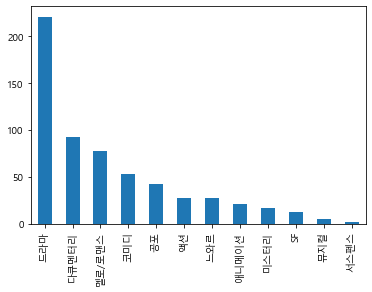

In [7]:
train_data['genre'].value_counts().plot(kind='bar')
print(freq_genre)
print("max size = {}, minsize = {}".format(str(max(freq_genre)),str(min(freq_genre))))

screening_rat
12세 관람가     102
15세 관람가     202
전체 관람가       92
청소년 관람불가    204
dtype: int64
max size = 204, minsize = 92


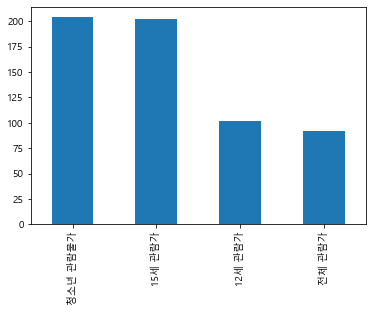

In [8]:
train_data['screening_rat'].value_counts().plot(kind='bar')
print(freq_rat)
print("max size = {}, minsize = {}".format(str(max(freq_rat)),str(min(freq_rat))))

director
New Pistol    1
강석필           1
강성옥           1
강우석           2
강의석           1
             ..
황석호           1
황욱            1
황유식           1
황인호           2
황철민           1
Length: 472, dtype: int64
max size = 7, minsize = 1


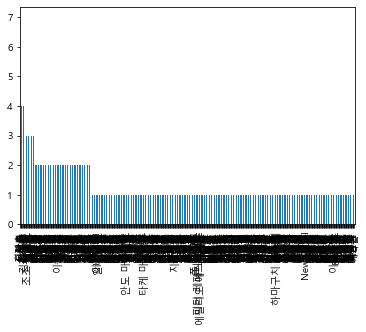

In [9]:
train_data['director'].value_counts().plot(kind='bar')
print(freq_director)
print("max size = {}, minsize = {}".format(str(max(freq_director)),str(min(freq_director))))

distributor
(주) 브릿지웍스          3
(주) 액티버스엔터테인먼트     2
(주) 영화사조제         10
(주) 영화제작전원사        3
(주) 케이알씨지         14
                  ..
필름라인               1
하준사                1
한국YWCA연합회          1
홀리가든               4
화앤담이엔티             2
Length: 169, dtype: int64
max size = 54, minsize = 1


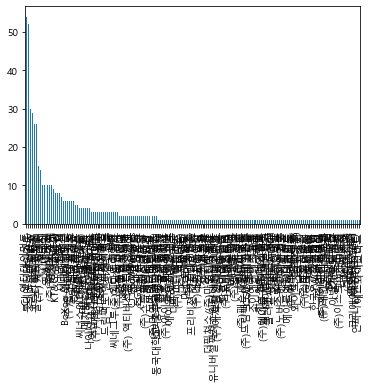

In [10]:
train_data['distributor'].value_counts().plot(kind='bar')
print(freq_distributor)
print("max size = {}, minsize = {}".format(str(max(freq_distributor)),str(min(freq_distributor))))


In [11]:
list_dis = []
list_dir = []
for i in range(600):
    list_dis.append(freq_distributor[train_data['distributor'][i]])
    list_dir.append(freq_director[train_data['director'][i]])
train_data['freq_distributor'] = list_dis
train_data['freq_director'] = list_dir


In [ ]:
train_data

In [12]:
#hundred_students = pd.get_dummies(hundred_students, columns=['지역'], prefix='지역')

train_data = pd.get_dummies(train_data, columns=['genre'], prefix='genre')

In [13]:
train_data = pd.get_dummies(train_data, columns=['screening_rat'], prefix='screening_rat')

In [14]:
train_data

,title,distributor,release_time,time,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,개들의 전쟁,롯데엔터테인먼트,2012-11-22,96,조병옥,0.00,0,91,2,23398,...,0,0,0,0,1,0,0,0,0,1
1,내부자들,(주)쇼박스,2015-11-19,130,우민호,1161602.50,2,387,3,7072501,...,0,0,0,0,0,0,0,0,0,1
2,은밀하게 위대하게,(주)쇼박스,2013-06-05,123,장철수,220775.25,4,343,4,6959083,...,0,0,0,0,1,0,0,1,0,0
3,나는 공무원이다,(주)NEW,2012-07-12,101,구자홍,23894.00,2,20,6,217866,...,0,0,0,0,0,1,0,0,1,0
4,불량남녀,쇼박스(주)미디어플렉스,2010-11-04,108,신근호,1.00,1,251,2,483387,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,2014-08-13,111,심성보,3833.00,1,510,7,1475091,...,0,0,0,0,0,0,0,0,0,1
596,파파로티,(주)쇼박스,2013-03-14,127,윤종찬,496061.00,1,286,6,1716438,...,0,0,0,0,0,0,0,1,0,0
597,살인의 강,(주)마운틴픽쳐스,2010-09-30,99,김대현,0.00,0,123,4,2475,...,0,0,0,0,0,0,0,0,0,1
598,악의 연대기,CJ 엔터테인먼트,2015-05-14,102,백운학,0.00,0,431,4,2192525,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
train_data['release_time'] = train_data['release_time'].str.replace("-","")
train_data['release_time'] = pd.to_numeric(train_data['release_time'])

In [ ]:
train_data.drop(columns = ['title','distributor','director'], inplace=True)

In [ ]:
train_data.info()

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap='PuBu')
plt.show()

In [ ]:
train_data.corr()['box_off_num'].sort_values()

In [ ]:
list_down = list(train_data.corr()['box_off_num'].sort_values()[4:15].keys())

In [ ]:
train_data3 = train_data.drop(columns=list_down, inplace=False)

In [ ]:
train_data3

In [ ]:
train_data2 = train_data.iloc[:,:9]

In [ ]:
train_tdata = train_data['box_off_num']
train_xdata = train_data.drop(columns ='box_off_num',inplace=False)

#corr반영
train_tdata3 = train_data3['box_off_num']
train_xdata3 = train_data3.drop(columns ='box_off_num',inplace=False)

from sklearn.model_selection import train_test_split
train_Xdata, test_Xdata, train_ydata, test_ydata = train_test_split(train_xdata,train_tdata, test_size=0.3, random_state=100)

train_Xdata3, test_Xdata3, train_ydata3, test_ydata3 = train_test_split(train_xdata3,train_tdata3, test_size=0.3, random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(normalize= True)
model3 = LinearRegression(normalize= True)

In [ ]:
model.fit(train_Xdata, train_ydata)
model3.fit(train_Xdata3, train_ydata3)

In [ ]:
predicted = model.predict(test_Xdata)
predicted3 = model3.predict(test_Xdata3)

In [ ]:
model_score = model.score(test_Xdata,test_ydata)
model_score3 = model3.score(test_Xdata3,test_ydata3)

In [ ]:
print("\n> 모델 평가 점수 :", model_score)

print("\n> 모델 평가 점수 :", model_score3)

In [ ]:
model.coef_

In [ ]:
model3.coef_

In [ ]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC()
svc3 = SVC()

In [ ]:
svc.fit(train_Xdata, train_ydata)
svc3.fit(train_Xdata3, train_ydata3)

In [ ]:
accuracy_train = accuracy_score(train_ydata, svc.predict(train_Xdata))
accuracy_test = accuracy_score(test_ydata, svc.predict(test_Xdata))

accuracy_train3 = accuracy_score(train_ydata3, svc3.predict(train_Xdata3))
accuracy_test3 = accuracy_score(test_ydata3, svc3.predict(test_Xdata3))

In [ ]:
print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test3, accuracy_train3))

In [ ]:
test_data['dir_prev_bfnum'] = train_data['dir_prev_bfnum'].fillna(0)
freq_distributor = test_data.groupby('distributor').size()
freq_genre = test_data.groupby('genre').size()
freq_rat = test_data.groupby('screening_rat').size()
freq_director = test_data.groupby('director').size()
list_dis = []
list_dir = []
for i in range(len(test_data)):
    list_dis.append(freq_distributor[test_data['distributor'][i]])
    list_dir.append(freq_director[test_data['director'][i]])
test_data['freq_distributor'] = list_dis
test_data['freq_director'] = list_dir
test_data = pd.get_dummies(test_data, columns=['genre'], prefix='genre')
test_data = pd.get_dummies(test_data, columns=['screening_rat'], prefix='screening_rat')
test_data['release_time'] = test_data['release_time'].str.replace("-","")
test_data['release_time'] = pd.to_numeric(test_data['release_time'])
test_data.drop(columns = ['title','distributor','director'], inplace=True)

In [ ]:
model = LinearRegression()
model.fit(train_Xdata3, train_ydata3)
predicted = model.predict(test_data)

In [ ]:
len(predicted)

In [ ]:
submit = pd.read_csv('./data/movies/submission.csv')

In [ ]:
submit['box_off_num'] = predicted

In [ ]:
submit

In [ ]:
submit.to_csv('C:/Users/smj71/Desktop/sub.csv', index= False)

### K-Fold 교차검증

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(5)
n_iter = 0
model_scores = []
model=LinearRegression()

for train_idx, val_idx in kfold.split(train_Xdata):
    
    # 4. 학습용과 검증용으로 나눈 데이터를 저장합니다.
    X_train, X_val = train_Xdata[train_idx], train_Xdata[val_idx]
    y_train, y_val = train_ydata[train_idx], train_ydata[val_idx]


    # 5. 학습용 데이터로 모델 학습을 진행합니다.
    model.fit(X_train,y_train)

    # 각 Iter 별 모델 평가 점수를 측정하여 변수 score에 저장합니다.
    score = model.score(X_val, y_val)
    
    train_size = X_train.shape[0]
    val_size = X_val.shape[0]

    print("Iter : {0} K fold Cross-Validation Score : {1}, Train Data 크기 : {2}, Validation Data 크기 : {3}"
          .format(n_iter, score, train_size, val_size))
    
    n_iter += 1
    model_scores.append(score)

print("\n> 평균 검증 모델 점수 : ", np.mean(model_scores)) # 평균 모델 점수 출력
print("> 테스트 데이터 모델 점수 : ", model.score(test_Xdata,test_ydata))

## tensorflow deeplearning

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)